In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [2]:
image = cv2.imread('pics/2700.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

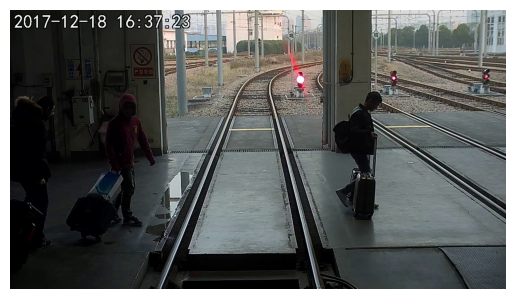

In [3]:
plt.imshow(image)
plt.axis('off')
plt.show()

In [4]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
sam_checkpoint = "/data/chenxu/dataset/SAM_model/sam_vit_h_4b8939.pth"
model_type = "vit_h"
device = "cuda"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

RuntimeError: Error(s) in loading state_dict for Sam:
	Unexpected key(s) in state_dict: "mask_decoder.hf_token.weight", "mask_decoder.hf_mlp.layers.0.weight", "mask_decoder.hf_mlp.layers.0.bias", "mask_decoder.hf_mlp.layers.1.weight", "mask_decoder.hf_mlp.layers.1.bias", "mask_decoder.hf_mlp.layers.2.weight", "mask_decoder.hf_mlp.layers.2.bias", "mask_decoder.compress_vit_feat.0.weight", "mask_decoder.compress_vit_feat.0.bias", "mask_decoder.compress_vit_feat.1.weight", "mask_decoder.compress_vit_feat.1.bias", "mask_decoder.compress_vit_feat.3.weight", "mask_decoder.compress_vit_feat.3.bias", "mask_decoder.embedding_encoder.0.weight", "mask_decoder.embedding_encoder.0.bias", "mask_decoder.embedding_encoder.1.weight", "mask_decoder.embedding_encoder.1.bias", "mask_decoder.embedding_encoder.3.weight", "mask_decoder.embedding_encoder.3.bias", "mask_decoder.embedding_maskfeature.0.weight", "mask_decoder.embedding_maskfeature.0.bias", "mask_decoder.embedding_maskfeature.1.weight", "mask_decoder.embedding_maskfeature.1.bias", "mask_decoder.embedding_maskfeature.3.weight", "mask_decoder.embedding_maskfeature.3.bias". 

In [ ]:
mask_generator = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=128,
    pred_iou_thresh=0.9,
    stability_score_thresh=0.9,
    crop_n_layers=4,
    crop_n_points_downscale_factor=2,
    min_mask_region_area=0,  # Requires open-cv to run post-processing
)

In [ ]:
masks2 = mask_generator.generate(image)

In [ ]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    # output_mode=binary_mask
    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    # output_mode=coco_rle
    # img = np.ones((sorted_anns[0]['segmentation']['size'][0], sorted_anns[0]['segmentation']['size'][1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        # print(ann['segmentation'])
        # output_mode=binary_mask
        m = ann['segmentation']
        # print(m)
        # output_mode=coco_rle
        # m = ann['segmentation']['counts']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

In [ ]:
plt.imshow(image)
show_anns(masks2)
plt.axis('off')
plt.show()